<h1>Projeto 02: Titanic</h1>

<p>
<h1>Introdução</h1>
O projeto visa a conclusão do curso Fundamentos de Data Science I e busca investigar as informações fornecidas do naufrágio do Titanic (https://www.kaggle.com/c/titanic/data). <br>

Depois de uma investigação dos dados brutos fornecidos, foi possível realizar cinco perguntas que serão respondidas na conclusão, porém a análise das informações serão realizadas junto aos gráficos de suas respectivas perguntas:
<ul>
    <il>Qual sexo teve mais sobrevivêntes?</il><br>
    <il>Qual das classes teve mais sobrevivêntes?</il><br>
    <il>Qual faixa etária teve mais sobrevivêntes?</il><br>
    <il>Qual local de embarque teve mais sobre sobrevivêntes?</il><br>
    <il>Como as seguintes colunas se relacionaram com a sobrevivência dos passageiros: 'sex', 'pclass', 'embarked'?</il><br>
</ul>

Ao decorrer do documento, serão realizados todos os processos de importação, avaliação, limpeza, filtragem e análise das informação junto aos gráficos.
</p>

<h1>Data Wrangling</h1>
<h2>Importação das bibliotecas</h2>
Nesta etapa, ocorre a importação das bibliotecas necessárias para o desenvolvimento do código e geração dos gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<h2>Importação dos dados</h2>
Nesta etapa, ocorre a importação dos dados de seu arquivo original e uma visualização das primeiras cinco linhas do arquivo para poder verificar se a importação foi feita corretamente. Na primeira vizualização dos dados, já é possível notar que será necessário resolver alguns problemas com relação aos valores das colunas. As soluções destes problemas serão detalhadas no próximo tópico.

In [2]:
titanic_df = pd.read_csv('titanic_data_6.csv')

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<h2>Avaliação</h2>
Ao utilizar a função <b><i>info</i></b> no Data Frame chamado de <b><i>titanic_df</i></b>, foi possível notar qual falta informações nas seguintes colunas: <b><i>Age</i></b>, <b><i>Cabin</i></b> e <b><i>Embarked</i></b>. Além disso, é necessário tornar os nomes das colunas em caixa baixa por padrão. E, por fim, é possível verificar que a quantidades de linhas duplicas.

In [3]:
# Mostra como os dados estão antes das alterações
titanic_df.info()

# Verificar linhas duplicados
print('Quantidade de linhas duplicados: {}'.format(titanic_df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
Quantidade de linhas duplicados: 0


<h2>Limpeza de dados</h2>
Iniciando a limpeza dos dados, renomeei todas as colunas deixando-as em caixa baixa para padronizar os nomes das colunas e preenchi os valores nas colunas onde faltava informação seguindo o seguinte padrão: Na coluna de <b><i>age</b></i>, eu calculei mediana e adicionei onde estava nulo; Nas colunas <b><i>embarked</b></i> e <b><i>cabin</b></i>, eu utilizei a função <b><i>mode</b></i> para selecionar os valores que aparecem com mais frequência e os inseri nas suas respectivas colunas.

In [4]:
# Renomear todas as colunas
titanic_df.rename(columns=lambda column: column.lower(), inplace=True)

# Preenchimento dos valores nas colunas onde havia falta de informação
titanic_df.age.fillna(titanic_df.age.median(), inplace=True)
titanic_df.embarked.fillna(titanic_df.embarked.mode()[0], inplace = True)
titanic_df.cabin.fillna(titanic_df.cabin.mode()[2], inplace = True)

# Vizualização das informações do DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          891 non-null object
embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h2>Inicialização de Variáveis</h2>
Criação de variáveis que servirão como legendas para os gráficos em português do Brasil:

In [5]:
# Cria e inicializa as variáveis responsáveis pelas legendas de cada característica
survived_pt_br = ['Sobrevivente', 'Não Sobrevivente']
sex_pt_br = ['Feminino', 'Masculino']
classes_pt_br = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
age_pt_br = ['Criança', 'Pré-Adolescente', 'Adolescente', 'Adulto', 'Idoso']
embarked_pt_br = ['Cherbourg', 'Queenstown', 'Southampton']

Criação de variáveis que representam os valores de cada característica a ser analisada. No caso da idade, eu segui o seguinte padrão para facilitar o entendimento dos dados: <b><i>Criança:</b></i> 0 - 9 anos; <b><i>Pré-Adolescente:</b></i> 10 - 14 anos; <b><i>Adolescente:</b></i> 15 - 21 anos; <b><i>Adulto:</b></i> 22 - 64 anos; <b><i>Idoso:</b></i> 65 - 100 anos.

In [6]:
# Cria e inicializa as variáveis específicas de cada característica
survived_values = list(titanic_df.groupby('survived')['survived'].groups.keys())
sex_values = list(titanic_df.groupby('sex')['sex'].groups.keys())
classes_values = list(titanic_df.groupby('pclass')['pclass'].groups.keys())
age_values = ['0.9', '10.14', '15.21', '22.64', '65.100']
embarked_values = list(titanic_df.groupby('embarked')['embarked'].groups.keys())

Criação de variáveis que contaram a quantidade de elementos de cada característica:

In [7]:
# Cria e inicializa as variáveis que representam a contagem de sobreviventes de cada característica
survived_sex = []
survived_pclass = []
survived_age = []
survived_embarked = []

# Cria e inicializa as variáveis que representam a contagem de não sobreviventes de cada característica
unsurvived_sex = []
unsurvived_pclass = []
unsurvived_age = []
unsurvived_embarked = []

<h2><b>Filtragem de dados</b><br></h2>
Realiza a contagem e a atribuição dos valores as variáveis anteriores:

In [8]:
# Realiza a contagem e a atribuição dos valores as variáveis anteriores:
for survivel_value in survived_values:
    # Realiza a contagem e a atribuição dos valores referentes ao sexo das pessoas:
    for sex in sex_values:
        if survivel_value == 0:
            unsurvived_sex.append(titanic_df.query('survived == {} & sex == "{}"'.format(survivel_value, sex))['sex'].count())
        else:
            survived_sex.append(titanic_df.query('survived == {} & sex == "{}"'.format(survivel_value, sex))['sex'].count())
    
    # Realiza a contagem e a atribuição dos valores referentes as classes onde as pessoas estavam embarcadas:
    for pclass in classes_values:
        if survivel_value == 0:
            unsurvived_pclass.append(titanic_df.query('survived == {} & pclass == {}'.format(survivel_value, pclass))['pclass'].count())
        else:
            survived_pclass.append(titanic_df.query('survived == {} & pclass == {}'.format(survivel_value, pclass))['pclass'].count())
     
    # Realiza a contagem e a atribuição dos valores referentes a idade das pessoas:
    for age in age_values:
        if survivel_value == 0:
            unsurvived_age.append(titanic_df.query('survived == {} & age >= {} & age <= {}'.format(survivel_value, age.split('.')[0], age.split('.')[1]))['age'].count())
        else:
            survived_age.append(titanic_df.query('survived == {} & age >= {} & age <= {}'.format(survivel_value, age.split('.')[0], age.split('.')[1]))['age'].count())     
        
    for embarked in embarked_values:
        if survivel_value == 0:
            unsurvived_embarked.append(titanic_df.query('survived == {} & embarked == "{}"'.format(survivel_value, embarked))['embarked'].count())
        else:
            survived_embarked.append(titanic_df.query('survived == {} & embarked == "{}"'.format(survivel_value, embarked))['embarked'].count())

In [9]:
def survived_df(survived: list, unsurvived: list, indexs: list):
    
    # Função que retorna um dataframe com as informações passadas por parâmetro.
    # Argumento:
    #       survived: é a lista com a quantidade de pessoas que sobreviveram com uma característica específica.
    #       unsurvived: é a lista com a quantidade de pessoas que não sobreviveram com uma característica específica.
    #       indexs: é uma lista que contem os indexadores do DataFrame
    #  Retorna: Um DataFrame contendo as informações passadas como parâmetro
    
    # Criação de um dicionário para inserção das informações de sobrevivência e não sobrevivência
    survived_dict = {'Sobrevivente': [], 'Morto': []}
    
    for index in range(len(survived)):                
        survived_dict['Sobrevivente'].append(survived[index])        
        survived_dict['Morto'].append(unsurvived[index])
    
    # Retorna um DataFrame contendo as informações de sobrevivência e não sobrevivência
    return pd.DataFrame(survived_dict, index = indexs)

In [37]:
def plot_bar_pie(dataframe, title: str):
    
    # Função que cria um gráfico do tipo barra e pizza de acordo com configurações fixas.
    # Argumento:
    #       dataframe: é o DataFrame que será usado para a criação dos gráficos.
    #       title: é a string que representará o título do gráfico.
    #  Retorna: sem retorno
    
    # Cria o gráfico de barra
    dataframe.plot.bar(title=title, rot=0)
    plt.ylabel('Quantidade de passageiros')
    
    # Cria o gráfico de pizza para os sobreviventes e define a legenda no melhor lugar possível
    dataframe.plot.pie(y='Sobrevivente', subplots=True, autopct='%1.0f%%')
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
    
    # Cria o gráfico de pizza para os sobreviventes e define a legenda no melhor lugar possível
    dataframe.plot.pie(y='Morto', subplots=True, autopct='%1.0f%%')
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

<h2>Análise de dados e gráficos</h2>
O gráfico abaixo mostra demonstra a relação entre as variáveis <b>sex</b> e <b>survived</b>. É possível notar que 68% dos sobreviventes são mulheres e que 85% dos mortos são homens.

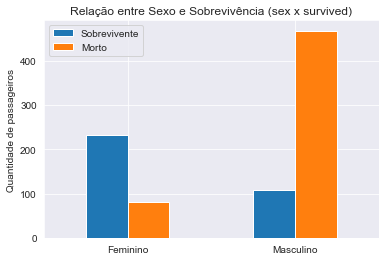

In [38]:
plot_bar_pie(survived_df(survived_sex, unsurvived_sex, sex_pt_br), 'Relação entre Sexo e Sobrevivência (sex x survived)')

O gráfico abaixo mostra demonstra a relação entre as variáveis <b>pclass</b> e <b>survived</b>. É possível notar que, dos sobreviventes, 40% são da primeira classe, seguido por 35% da terceira e 25% da segunda classe e que, dos mortos, 68% são da terceira classe, seguidos por 18% da segunda e 15% da primeira classe. Ou seja, os passageiros da primeira classe sobreviveram em sua maioria e que a maioria dos passageiros da terceira classe morreram.

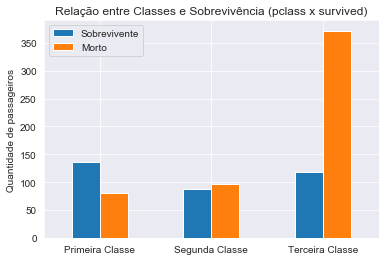

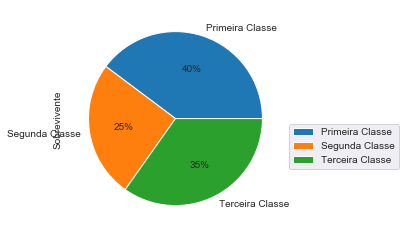

In [39]:
plot_bar_pie(survived_df(survived_pclass, unsurvived_pclass, classes_pt_br), 'Relação entre Classes e Sobrevivência (pclass x survived)')

Seguindo esse padrão: <b><i>Criança:</b></i> 0 - 9 anos; <b><i>Pré-Adolescente:</b></i> 10 - 14 anos; <b><i>Adolescente:</b></i> 15 - 21 anos; <b><i>Adulto:</b></i> 22 - 64 anos; <b><i>Idoso:</b></i> 65 - 100 anos. Segundo os gráficos, entre os sobreviventes e os mortos a maioria estavam nas seguintes faixa etária: Adultos, Adolescentes e Crianças.

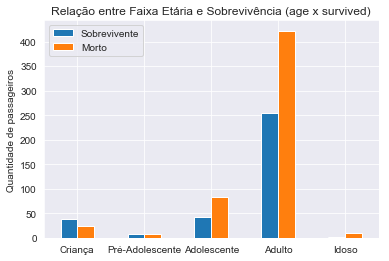

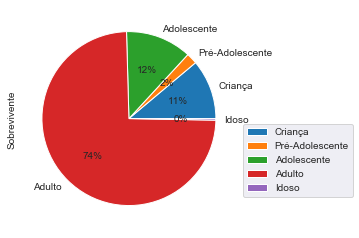

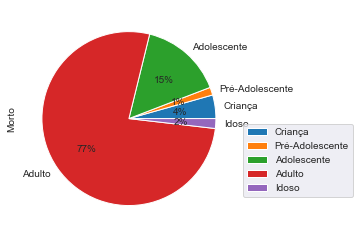

In [40]:
plot_bar_pie(survived_df(survived_age, unsurvived_age, age_pt_br), 'Relação entre Faixa Etária e Sobrevivência (age x survived)')

Com o gráfico, é possivel observar que a maior quantidade dos sobreviventes e mortos seguem a seguinte ordem: Southampton, Queenstown e Cherbourg

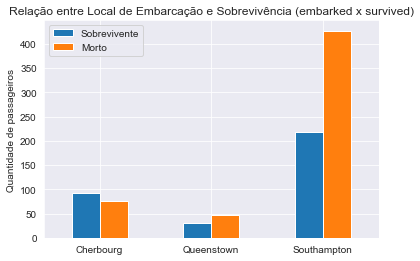

In [41]:
plot_bar_pie(survived_df(survived_embarked, unsurvived_embarked, embarked_pt_br), 'Relação entre Local de Embarcação e Sobrevivência (embarked x survived)')

Com esse gráfico, é possível perceber a distibuição dos mortos e sobreviventes ao naufrágio em relação ao sexo, local de embarque e classe. Nos três gráficos, é notável que as mulheres tanto da primeira quanto da segunda classe tiveram maior chance de sobrevivência e que, entre a terceira classe, apenas as mulheres que embarcaram em Queenstown tiveram a mesma chance.

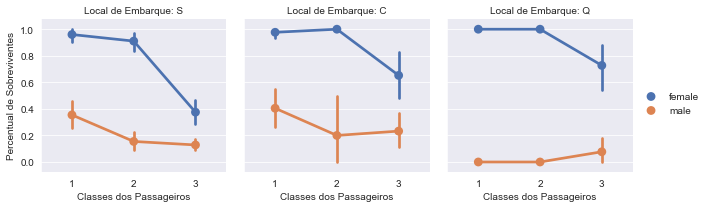

In [44]:
e = sns.FacetGrid(titanic_df, col = 'embarked')
e.map(sns.pointplot, 'pclass', 'survived', 'sex', ci=95.0, palette = 'deep', order = classes_values, hue_order=sex_values).set_axis_labels("Classes dos Passageiros", "Percentual de Sobreviventes").set_titles("Local de Embarque: {col_name}")
e.add_legend()

<h1>Conclusão</h1> 
Depois de realizar todos os processos de importação, avaliação e limpeza de dados, foi possível realizar os cálculos necessários para a geração dos gráficos que resultou na resolução das perguntas. Em resposta a primeira pergunta, o sexo feminino foi o que teve mais sobreviventes, mas também é possível notar que mais do que o dobro dos homens morreram. Em resposta a segunda pergunta, a classe que teve mais sobreviventes foi a primeira, seguidas pela terceira e pela segunda, porém é interessante notar que menos da metade das pessoas alocadas na terceira classe sobreviveu. Em resposta a terceira pergunta, a faixa etária que teve mais sobrevivente foi a adulta que representa as pessoas que tem entre 22 a 64 anos. Em resposta a quarta pergunta, o local de embarque que teve mais sobrevivente foi Southampton, porém o mesmo é aquele que teve mais passageiros mortos. E, por fim, em resposta a quinta e última pergunta, é possível notar a distribuição dos sobreviventes que, em sua maioria, é formado de mulheres de primeira e segunda classe vindas dos três locais de embarque.
<h3>Limitações da Análise</h3>
A conclusão final do projeto foi realizada no parágrafo acima, porém é necessário discutir alguns aspectos em relação aos dados fornecidos. Como foi dito na introdução, as informações foram adquiridas no site da Kaggle. Os dados são um conjunto de treinamento para uma competição de predição, porém o mesmo não contem todas as informação sobre os passageiros e tripulantes do Titanic, sendo que, dos 1300 integrantes, foi utilizado apenas 891 para este projeto.<br>
Além disso, haviam alguns valores faltando em algumas colunas o que tornaria difícil a criação de uma análise coesa e coerente, por isso as informações tiveram que passar pelo processo de limpeza, porém, mesmo assim, análise realizada neste projeto não está cem porcento (100%) completa devivo a falta dos dados dos outros 409 passageiros e que, durante a limpeza, técnicas foram usadas para supor ou preencher esses espaços.